# Data Exploration on our dataset

### Let's open our CSV file containing our list of books and meta data

In [57]:
# imports and setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import csv
import os 


### read the CSV file and store it in a df

In [58]:
# read csv file and store to dataframe
abs_path = "/Users/nicolas/code/Nico404/youwritelike/youwritelike/fetch-data/raw_data/csv/books.csv"

books_df = pd.read_csv(abs_path, sep=',', encoding='utf-8', names=['id', 'title', 'authors', 'subjects', 'languages', 'formats', 'download_count'])
books_df

,id,title,authors,subjects,languages,formats,download_count
0,2147,The Works of Edgar Allan Poe — Volume 1,Poe Edgar Allan,American fiction -- 19th century Fantasy ficti...,en,https://www.gutenberg.org/ebooks/2147.txt.utf-8,2428
1,8121,Ghosts,Ibsen Henrik,Domestic drama Europe -- Social conditions -- ...,en,https://www.gutenberg.org/ebooks/8121.txt.utf-8,2422
2,70691,A fighting man of Mars,Burroughs Edgar Rice,Life on other planets -- Fiction Mars (Planet)...,en,https://www.gutenberg.org/ebooks/70691.txt.utf-8,2411
3,4980,Old Granny Fox,Burgess Thornton W. (Thornton Waldo),Animals -- Juvenile fiction Foxes -- Juvenile ...,en,https://www.gutenberg.org/ebooks/4980.txt.utf-8,2392
4,6133,The Extraordinary Adventures of Arsène Lupin G...,Leblanc Maurice,Adventure stories French -- Translations into ...,en,https://www.gutenberg.org/ebooks/6133.txt.utf-8,2391
...,...,...,...,...,...,...,...
2696,8776,The Impostures of Scapin,Molière,Comedies French drama -- 17th century -- Trans...,en,https://www.gutenberg.org/ebooks/8776.txt.utf-8,164
2697,10706,The History of Rome (Volumes 1-5),Mommsen Theodor,Rome -- History,en,https://www.gutenberg.org/ebooks/10706.txt.utf-8,164
2698,13131,The Were-Wolf,Housman Clemence,Werewolves -- Fiction,en,https://www.gutenberg.org/ebooks/13131.txt.utf-8,164
2699,14004,The Every-day Life of Abraham Lincoln: A Narra...,Browne Francis F. (Francis Fisher),Lincoln Abraham 1809-1865 Presidents -- United...,en,https://www.gutenberg.org/ebooks/14004.txt.utf-8,164


### let's enrich the dataset with word count and character count

In [59]:
abs_path_books = "/Users/nicolas/code/Nico404/youwritelike/youwritelike/fetch-data/raw_data/books/" 

def count_words(id):
    ''' Count words in the book '''
    # first check if file exists
    if not os.path.isfile(f'{abs_path_books}{id}.txt'):
        return None
    # if it exists, count words
    with open(f'{abs_path_books}{id}.txt', 'r') as file:
        text = file.read()
        words = text.split()
        return len(words)

# store word count in a new column
books_df['word_count'] = books_df['id'].apply(count_words)

In [60]:
books_df

,id,title,authors,subjects,languages,formats,download_count,word_count
0,2147,The Works of Edgar Allan Poe — Volume 1,Poe Edgar Allan,American fiction -- 19th century Fantasy ficti...,en,https://www.gutenberg.org/ebooks/2147.txt.utf-8,2428,93421.0
1,8121,Ghosts,Ibsen Henrik,Domestic drama Europe -- Social conditions -- ...,en,https://www.gutenberg.org/ebooks/8121.txt.utf-8,2422,27267.0
2,70691,A fighting man of Mars,Burroughs Edgar Rice,Life on other planets -- Fiction Mars (Planet)...,en,https://www.gutenberg.org/ebooks/70691.txt.utf-8,2411,88879.0
3,4980,Old Granny Fox,Burgess Thornton W. (Thornton Waldo),Animals -- Juvenile fiction Foxes -- Juvenile ...,en,https://www.gutenberg.org/ebooks/4980.txt.utf-8,2392,26086.0
4,6133,The Extraordinary Adventures of Arsène Lupin G...,Leblanc Maurice,Adventure stories French -- Translations into ...,en,https://www.gutenberg.org/ebooks/6133.txt.utf-8,2391,56978.0
...,...,...,...,...,...,...,...,...
2696,8776,The Impostures of Scapin,Molière,Comedies French drama -- 17th century -- Trans...,en,https://www.gutenberg.org/ebooks/8776.txt.utf-8,164,18250.0
2697,10706,The History of Rome (Volumes 1-5),Mommsen Theodor,Rome -- History,en,https://www.gutenberg.org/ebooks/10706.txt.utf-8,164,882117.0
2698,13131,The Were-Wolf,Housman Clemence,Werewolves -- Fiction,en,https://www.gutenberg.org/ebooks/13131.txt.utf-8,164,18308.0
2699,14004,The Every-day Life of Abraham Lincoln: A Narra...,Browne Francis F. (Francis Fisher),Lincoln Abraham 1809-1865 Presidents -- United...,en,https://www.gutenberg.org/ebooks/14004.txt.utf-8,164,211120.0


In [61]:
abs_path_books = "/Users/nicolas/code/Nico404/youwritelike/youwritelike/fetch-data/raw_data/books/" 

def count_chars(id):
    ''' Count chars in the book '''
    # first check if file exists
    if not os.path.isfile(f'{abs_path_books}{id}.txt'):
        return None
    # if it exists, count chars
    with open(f'{abs_path_books}{id}.txt', 'r') as file:
        text = file.read()
        chars = list(text)
        return len(chars)

# store char count in a new column
books_df['char_count'] = books_df['id'].apply(count_chars)

In [62]:
books_df

,id,title,authors,subjects,languages,formats,download_count,word_count,char_count
0,2147,The Works of Edgar Allan Poe — Volume 1,Poe Edgar Allan,American fiction -- 19th century Fantasy ficti...,en,https://www.gutenberg.org/ebooks/2147.txt.utf-8,2428,93421.0,590400.0
1,8121,Ghosts,Ibsen Henrik,Domestic drama Europe -- Social conditions -- ...,en,https://www.gutenberg.org/ebooks/8121.txt.utf-8,2422,27267.0,155739.0
2,70691,A fighting man of Mars,Burroughs Edgar Rice,Life on other planets -- Fiction Mars (Planet)...,en,https://www.gutenberg.org/ebooks/70691.txt.utf-8,2411,88879.0,484758.0
3,4980,Old Granny Fox,Burgess Thornton W. (Thornton Waldo),Animals -- Juvenile fiction Foxes -- Juvenile ...,en,https://www.gutenberg.org/ebooks/4980.txt.utf-8,2392,26086.0,139420.0
4,6133,The Extraordinary Adventures of Arsène Lupin G...,Leblanc Maurice,Adventure stories French -- Translations into ...,en,https://www.gutenberg.org/ebooks/6133.txt.utf-8,2391,56978.0,328931.0
...,...,...,...,...,...,...,...,...,...
2696,8776,The Impostures of Scapin,Molière,Comedies French drama -- 17th century -- Trans...,en,https://www.gutenberg.org/ebooks/8776.txt.utf-8,164,18250.0,99719.0
2697,10706,The History of Rome (Volumes 1-5),Mommsen Theodor,Rome -- History,en,https://www.gutenberg.org/ebooks/10706.txt.utf-8,164,882117.0,5323985.0
2698,13131,The Were-Wolf,Housman Clemence,Werewolves -- Fiction,en,https://www.gutenberg.org/ebooks/13131.txt.utf-8,164,18308.0,106002.0
2699,14004,The Every-day Life of Abraham Lincoln: A Narra...,Browne Francis F. (Francis Fisher),Lincoln Abraham 1809-1865 Presidents -- United...,en,https://www.gutenberg.org/ebooks/14004.txt.utf-8,164,211120.0,1257502.0


In [63]:
# Check out the distribution of the number of books per language
books_df['languages'].value_counts()

languages
en     2639
fr       59
de        2
ceb       1
Name: count, dtype: int64

In [64]:
# Check out the distribution of the number of books per author
books_df['authors'].value_counts()

authors
Various                               37
Shakespeare William                   32
Burroughs Edgar Rice                  29
Anonymous                             26
Plato                                 23
                                      ..
Thérèse de Lisieux Saint               1
Harris Frank                           1
Sterling Bruce                         1
Smythe E. Louise (Emma Louise)         1
Browne Francis F. (Francis Fisher)     1
Name: count, Length: 1459, dtype: int64

In [65]:
# Check out the average number of words per author
books_df.groupby('authors')['word_count'].mean().sort_values(ascending=False)

authors
Brown Goold                              1002977.0
Project Gutenberg                         930452.5
Mommsen Theodor                           882117.0
Nuttall P. Austin                         796889.0
Library of Congress. Copyright Office     695670.0
                                           ...    
Romero George A.                            3066.0
Kennedy John F. (John Fitzgerald)           2761.0
Ward Grady                                  2723.0
Henry Patrick                               2537.0
Cleland John                                   NaN
Name: word_count, Length: 1459, dtype: float64

In [66]:
# Check out the average number of chars per author
books_df.groupby('authors')['char_count'].mean().sort_values(ascending=False)

authors
Brown Goold                              6266593.0
Project Gutenberg                        5620812.5
Library of Congress. Copyright Office    5497263.0
Mommsen Theodor                          5323985.0
Nuttall P. Austin                        4822761.0
                                           ...    
Romero George A.                           19709.0
Ward Grady                                 17595.0
Kennedy John F. (John Fitzgerald)          16064.0
Henry Patrick                              14854.0
Cleland John                                   NaN
Name: char_count, Length: 1459, dtype: float64

In [67]:
# check out the books from the author 'United States. Central Intelligence Agency'
books_df[books_df['authors'] == 'United States. Central Intelligence Agency']

,id,title,authors,subjects,languages,formats,download_count,word_count,char_count
640,35830,The 2010 CIA World Factbook,United States. Central Intelligence Agency,Geography -- Handbooks manuals etc. Political ...,en,https://www.gutenberg.org/files/35830/35830-re...,607,NaN,NaN
1766,14,The 1990 CIA World Factbook,United States. Central Intelligence Agency,Geography -- Handbooks manuals etc. Political ...,en,https://www.gutenberg.org/ebooks/14.txt.utf-8,243,266133.0,1916588.0
2534,27638,The 2001 CIA World Factbook,United States. Central Intelligence Agency,Geography -- Handbooks manuals etc. Political ...,en,https://www.gutenberg.org/files/27638/27638-RE...,174,NaN,NaN
2556,3672,The 2000 CIA World Factbook,United States. Central Intelligence Agency,Geography -- Handbooks manuals etc. Political ...,en,https://www.gutenberg.org/ebooks/3672.txt.utf-8,172,495815.0,3397569.0


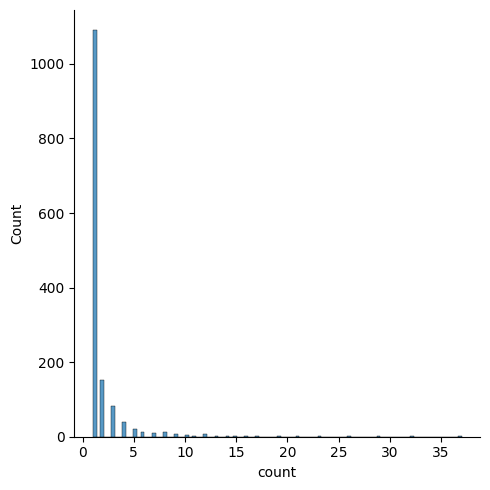

In [68]:
# let's plot the distribution of the number of books per author
sns.displot(books_df['authors'].value_counts(), bins=100)

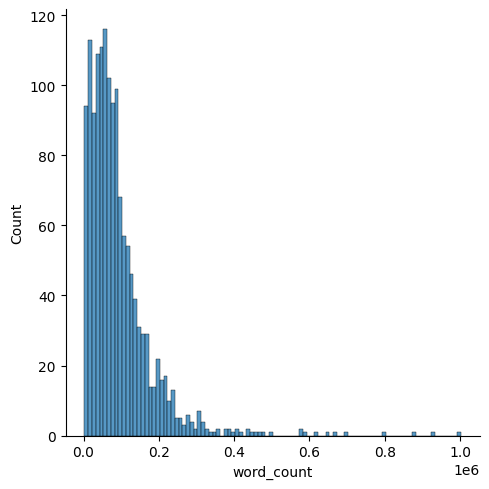

In [69]:
# let's plot the distribution of the number of words per author
sns.displot(books_df.groupby('authors')['word_count'].mean(), bins=100)

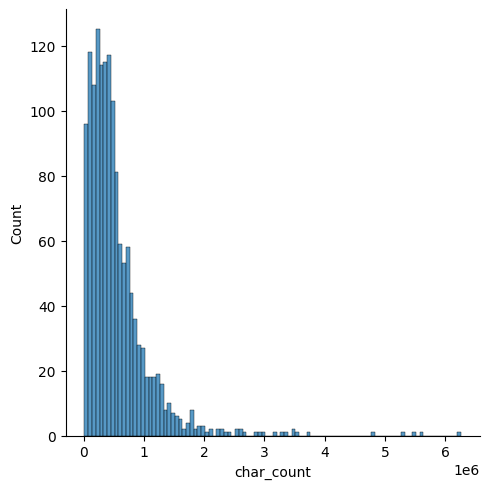

In [70]:
# let's plot the distribution of the number of chars per author
sns.displot(books_df.groupby('authors')['char_count'].mean(), bins=100)

In [71]:
# display the books which have been downloaded the most
books_df.sort_values(by='download_count', ascending=False)


,id,title,authors,subjects,languages,formats,download_count,word_count,char_count
0,2147,The Works of Edgar Allan Poe — Volume 1,Poe Edgar Allan,American fiction -- 19th century Fantasy ficti...,en,https://www.gutenberg.org/ebooks/2147.txt.utf-8,2428,93421.0,590400.0
1,8121,Ghosts,Ibsen Henrik,Domestic drama Europe -- Social conditions -- ...,en,https://www.gutenberg.org/ebooks/8121.txt.utf-8,2422,27267.0,155739.0
2,70691,A fighting man of Mars,Burroughs Edgar Rice,Life on other planets -- Fiction Mars (Planet)...,en,https://www.gutenberg.org/ebooks/70691.txt.utf-8,2411,88879.0,484758.0
3,4980,Old Granny Fox,Burgess Thornton W. (Thornton Waldo),Animals -- Juvenile fiction Foxes -- Juvenile ...,en,https://www.gutenberg.org/ebooks/4980.txt.utf-8,2392,26086.0,139420.0
4,6133,The Extraordinary Adventures of Arsène Lupin G...,Leblanc Maurice,Adventure stories French -- Translations into ...,en,https://www.gutenberg.org/ebooks/6133.txt.utf-8,2391,56978.0,328931.0
...,...,...,...,...,...,...,...,...,...
2694,6796,The Poems of Schiller — Third period,Schiller Friedrich,Poetry,en,https://www.gutenberg.org/ebooks/6796.txt.utf-8,164,49005.0,306528.0
2693,2918,The First and the Last: A Drama in Three Scenes,Galsworthy John,English drama,en,https://www.gutenberg.org/ebooks/2918.txt.utf-8,164,9895.0,59708.0
2691,1945,Egmont,Goethe Johann Wolfgang von,Egmont Lamoraal Graaf van 1522-1568 -- Drama T...,en,https://www.gutenberg.org/ebooks/1945.txt.utf-8,164,31974.0,184603.0
2690,1121,As You Like It,Shakespeare William,Comedies Exiles -- Drama Fathers and daughters...,en,https://www.gutenberg.org/ebooks/1121.txt.utf-8,164,26409.0,158472.0


In [75]:
# get a list of authors with more than 1 book in the dataset
authors = books_df['authors'].value_counts()
authors = authors[authors > 1]
authors = authors.index.tolist()

books_df = books_df[books_df['authors'].isin(authors)]
books_df 

,id,title,authors,subjects,languages,formats,download_count,word_count,char_count
0,2147,The Works of Edgar Allan Poe — Volume 1,Poe Edgar Allan,American fiction -- 19th century Fantasy ficti...,en,https://www.gutenberg.org/ebooks/2147.txt.utf-8,2428,93421.0,590400.0
1,8121,Ghosts,Ibsen Henrik,Domestic drama Europe -- Social conditions -- ...,en,https://www.gutenberg.org/ebooks/8121.txt.utf-8,2422,27267.0,155739.0
2,70691,A fighting man of Mars,Burroughs Edgar Rice,Life on other planets -- Fiction Mars (Planet)...,en,https://www.gutenberg.org/ebooks/70691.txt.utf-8,2411,88879.0,484758.0
3,4980,Old Granny Fox,Burgess Thornton W. (Thornton Waldo),Animals -- Juvenile fiction Foxes -- Juvenile ...,en,https://www.gutenberg.org/ebooks/4980.txt.utf-8,2392,26086.0,139420.0
4,6133,The Extraordinary Adventures of Arsène Lupin G...,Leblanc Maurice,Adventure stories French -- Translations into ...,en,https://www.gutenberg.org/ebooks/6133.txt.utf-8,2391,56978.0,328931.0
...,...,...,...,...,...,...,...,...,...
2692,2607,Psmith Journalist,Wodehouse P. G. (Pelham Grenville),Humorous stories,en,https://www.gutenberg.org/ebooks/2607.txt.utf-8,164,60216.0,341409.0
2693,2918,The First and the Last: A Drama in Three Scenes,Galsworthy John,English drama,en,https://www.gutenberg.org/ebooks/2918.txt.utf-8,164,9895.0,59708.0
2694,6796,The Poems of Schiller — Third period,Schiller Friedrich,Poetry,en,https://www.gutenberg.org/ebooks/6796.txt.utf-8,164,49005.0,306528.0
2696,8776,The Impostures of Scapin,Molière,Comedies French drama -- 17th century -- Trans...,en,https://www.gutenberg.org/ebooks/8776.txt.utf-8,164,18250.0,99719.0
